In [1]:
# Import necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Import the Height Weight Dataset 
data = pd.read_csv('Height_Age_Dataset.csv') 
data.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


In [2]:
#Store the data in the form of dependent and independent variables separately
X = data.iloc[:, 0:1].values 
y = data.iloc[:, 1].values 

In [3]:
#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
#Import the Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor  
  
#Create a decision tree regressor object  from DecisionTreeRegressor class
DtReg = DecisionTreeRegressor(random_state = 0)  
  
#Fit the decision tree regressor with training data represented by X_train and y_train
DtReg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [7]:
#Predicted Height from test dataset w.r.t Decision Tree Regression
y_predict_dtr = DtReg.predict((X_test))

#Model Evaluation using R-Square for Decision Tree Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_dtr)
print('R-Square Error associated with Decision Tree Regression is:', r_square)

R-Square Error associated with Decision Tree Regression is: 0.9941828370498541


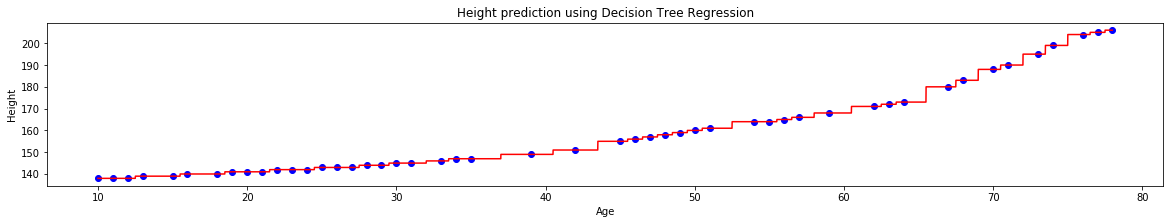

<Figure size 72x72 with 0 Axes>

In [23]:
''' Visualise the Decision Tree Regression by creating range of values from min value of X_train to max value of X_train  
having a difference of 0.01 between two consecutive values'''
X_val = np.arange(min(X_train), max(X_train), 0.01) 
  
#Reshape the data into a len(X_val)*1 array in order to make a column out of the X_val values 
X_val = X_val.reshape((len(X_val), 1))  
  
#Define a scatter plot for training data 
plt.scatter(X_train, y_train, color = 'blue') 
  
#Plot the predicted data 
plt.plot(X_val, DtReg.predict(X_val), color = 'red')  
  
#Define the title 
plt.title('Height prediction using Decision Tree Regression')  
  
#Define X axis label 
plt.xlabel('Age') 
  
#Define Y axis label 
plt.ylabel('Height') 

#Set the size of the plot for better clarity
plt.figure(figsize=(1,1))
  
#Draw the plot 
plt.show() 

In [22]:
#Import export_graphviz package
from sklearn.tree import export_graphviz  
  
#Store the decision tree in a tree.dot file in order to visualize the plot.
#Visualize it on http://www.webgraphviz.com/ by copying and pasting related data from dtregression.dot file
export_graphviz(DtReg, out_file ='dtregression.dot', 
               feature_names =['Age']) 

In [29]:
# Predicting Height based on Age using Decision Tree Regression 
height_pred = DtReg.predict([[41]])
print("Predicted Height: % d"% height_pred) 

Predicted Height:  151
